<a href="https://colab.research.google.com/github/anushka2711/Geeksman_AISquad_Project1_-anushka-gupta-/blob/master/notebook2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

first set up the kaggle api token .
Upload kaggle.json file

In [ ]:
from google.colab import files
my_file=files.upload()

Saving kaggle.json to kaggle (2).json



Setting up environment variables so that kaggle api can work .
importing the required libraries.

In [ ]:
import os
import pandas as pd
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

copying the api command token from the data-set and downloading the data-set.

In [ ]:
!kaggle datasets download -d anushka27/usda-cells

usda-cells.zip: Skipping, found more recently modified local copy (use --force to force download)


unzipping all the files present in the data set.

In [ ]:
!unzip "*.zip"

Streaming output truncated to the last 5000 lines.
  inflating: dataset2-master/images/TRAIN/MONOCYTE/_0_5448.jpeg  
  inflating: dataset2-master/images/TRAIN/MONOCYTE/_0_5486.jpeg  
  inflating: dataset2-master/images/TRAIN/MONOCYTE/_0_563.jpeg  
  inflating: dataset2-master/images/TRAIN/MONOCYTE/_0_5674.jpeg  
  inflating: dataset2-master/images/TRAIN/MONOCYTE/_0_5709.jpeg  
  inflating: dataset2-master/images/TRAIN/MONOCYTE/_0_5796.jpeg  
  inflating: dataset2-master/images/TRAIN/MONOCYTE/_0_5848.jpeg  
  inflating: dataset2-master/images/TRAIN/MONOCYTE/_0_5888.jpeg  
  inflating: dataset2-master/images/TRAIN/MONOCYTE/_0_5942.jpeg  
  inflating: dataset2-master/images/TRAIN/MONOCYTE/_0_6017.jpeg  
  inflating: dataset2-master/images/TRAIN/MONOCYTE/_0_6035.jpeg  
  inflating: dataset2-master/images/TRAIN/MONOCYTE/_0_620.jpeg  
  inflating: dataset2-master/images/TRAIN/MONOCYTE/_0_6229.jpeg  
  inflating: dataset2-master/images/TRAIN/MONOCYTE/_0_6256.jpeg  
  inflating: dataset2-maste

mounting google drive .

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


printing all data present in the below path.

In [ ]:
os.listdir("/content/images/TRAIN")

['models', 'EOSINOPHIL', 'LYMPHOCYTE', 'NEUTROPHIL', 'MONOCYTE']

importing the required libraries. these libraries reloads any edits to libraries that we make. and they also show all the images or charts in the notebook.

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Batch size is a term used in machine learning and refers to the number of training examples utilized in one iteration
it is here fixed constant to 64 because it is the most effective size in terms of running the program smoothly .


In [ ]:
bs=64

creating of data bunch . using ImageDataBunch and data augumentation is also done using get transforms(). here only flipping is done.

In [ ]:
path=""
tfms = get_transforms(do_flip=True)
data = ImageDataBunch.from_folder( Path("/content/images/TRAIN"), valid_pct=0.2, bs=64, size=224, ds_tfms=get_transforms())

just exploring the data , printing some images form the train data.


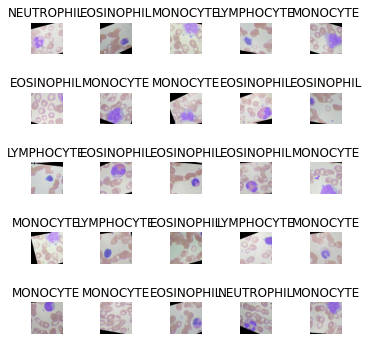

In [ ]:
data.show_batch(rows=5, figsize=(5,5))

printing all the classes of train data and printing the length i.e. no of classes

In [ ]:
print(data.classes)
len(data.classes)

['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']


4

creating the model to be trained
parameters:-
data - the data bumch that we have created and converting data into trainable format
models-For training, here resnet 50: 50 layers deep convolutional neural network is used. becuase it is more efficient than any other model in this project.
metrcs - it prints the accuracy in tabular format after each epoch


In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

training the module upto 4 epochs

In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.981739,0.300248,0.886489,01:29
1,0.377803,0.124927,0.952788,01:29
2,0.208364,0.076739,0.968860,01:29
3,0.151268,0.066181,0.978905,01:29


learning rate for each layer is different. the lower layers wihich are initaially trained need lesser learning rate but upper layer need higher learning rate. 
so, below we are finding the learning rate corresponding to trained data

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


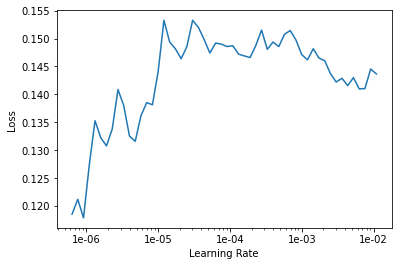

In [ ]:
learn.lr_find()
learn.recorder.plot()

google d

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


making a directory in which our data related to module is saved

In [ ]:
os.makedirs("/content/drive/My Drive/projects_my/cells_recog2",exist_ok=True)

creating a variable and storing path so that we need to write again.

In [ ]:
my_dir="/content/drive/My Drive/projects_my/cells_recog2"

saving the module and generating the stage.pth file. it saves the module so thatbwe dont have to train it gain and again.

In [ ]:
learn.save(my_dir+"/Stage-1")

In [ ]:
learn.load("/content/drive/My Drive/projects_my/cells_recog2/Stage-1")

Learner(data=ImageDataBunch;

Train: LabelList (7966 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
EOSINOPHIL,EOSINOPHIL,EOSINOPHIL,EOSINOPHIL,EOSINOPHIL
Path: /content/images/TRAIN;

Valid: LabelList (1991 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
NEUTROPHIL,MONOCYTE,EOSINOPHIL,MONOCYTE,NEUTROPHIL
Path: /content/images/TRAIN;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(

from here the model is generated from learn variable only

In [ ]:
learn.export(my_dir+"/export.pkl")

2 things necessary for prediction are
fastai library import
Our saved model

In [ ]:
predictor = load_learner(my_dir)

making prediction function which accepts a test_image address as input and will return result for us. provide address of image.

In [ ]:
def my_predictor(im):
  test_img =open_image(im)
  pred_class,pred_idx,outputs=predictor.predict(test_img)
  return pred_class


predicting a single image


In [ ]:
all_test_images=os.listdir("/content/test_data_anushka/test_anushka_/")

In [ ]:
print(all_test_images)

['c56ab235-bfb2-4917-962b-1139001f04f8.jpg', '93673e24-f5a1-4872-9241-c61d60deb0b6.jpg', 'c880afed-53e5-4453-8af6-0fe9af986809.jpg', '2b8e0b21-4556-4428-995f-f9c189754f12.jpg', '9a9dd6a6-22fd-49a2-bd3c-66353dd37430.jpg', '4f59b1d3-7d3c-46c7-abc9-c22402b0b18d.jpg', 'bd562d1c-f8a3-4d92-b7e1-d6bf7a65e5e9.jpg', 'acd0a5b3-d36e-406e-b2c1-b71499a307fa.jpg', 'ce6786e2-b82c-4481-9716-b47f8b0352fc.jpg', 'b0b840c7-a0f8-40f0-9328-442600b987cc.jpg', '23976965-25bf-4d8c-a93b-61b07c140f58.jpg', 'f054742e-0fd4-4368-b933-d6a03f62f958.jpg', '61efb87d-8772-4698-b250-93d5badfed0c.jpg', 'ab8405b6-7c1a-4586-9a76-42404599241f.jpg', 'b8cfac93-37cd-4875-9aee-61ad88648f28.jpg', 'c9c55114-ea90-47e9-9e48-8a72ce0c12b3.jpg', '3f2ed96f-ae3d-449c-afe9-ea24a86b85a7.jpg', 'd8935998-2656-46f0-ab0d-647c5342783a.jpg', 'eda0002d-e3f1-477c-a6e4-4fdf30bef7c3.jpg', '368f023c-a4bd-4f56-9da7-459d1c1bd3e7.jpg', 'f5d8363c-747b-4db5-86de-48115b6b655c.jpg', '1128b380-f1cd-462f-b2da-0ef9862f4c33.jpg', 'f5643597-344d-4d5e-8980-c9fe57

MONOCYTE


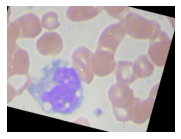

In [ ]:
idx=10
print(my_predictor("/content/test_data_anushka/test_anushka_/"+all_test_images[idx]))
img = open_image("/content/test_data_anushka/test_anushka_/"+all_test_images[idx])
img.show()

making of video using cv2.
colour , thickness and other parameters are managed according to requirement

In [ ]:
import cv2
test_files=os.listdir("/content/test_data_anushka/test_anushka_/")
os.makedirs("test_result",exist_ok=True)
i=0
for test_file in test_files:
  img=cv2.imread("/content/test_data_anushka/test_anushka_/"+test_file)
  cv2.imwrite("temp.jpg",img)
  ans_text=my_predictor("temp.jpg")
  font = cv2.FONT_HERSHEY_SIMPLEX 
  i+=1
  org = (0, 50) 
  fontScale = 1
  color = (250, 0, 0) 
  thickness = 2
  img = cv2.putText(img, str(ans_text), org, font,fontScale, color, thickness, cv2.LINE_AA) 
  cv2.imwrite("test_result/"+str(i)+".jpg", img)

In [ ]:
%cd "test_result"
!ffmpeg -framerate 1 -pattern_type glob -i '*.jpg' \-c:v libx264 -r 1 -pix_fmt yuv420p ../final_output.mp4
%cd ..

/content/test_result
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable

intalling kora drive to upload our video

In [ ]:
!pip install -U kora
from kora.drive import upload_public

Requirement already up-to-date: kora in /usr/local/lib/python3.6/dist-packages (0.4.23)


creating a public url to video

In [ ]:
url = upload_public('final_output.mp4')

printing url

In [ ]:
url

displaying the video created

In [ ]:
from IPython.display import HTML
HTML(f"""<video src={url} width=500 controls/>""")